<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b>Parcial 2 - Punto 3 </b>
<br>
<i><b>Estudiantes:</b></i> 
<br>
Miguel Angel Rojas, Luis Felipe velasquez
<br>
<i><b>Docentes:</b></i> 
<br>
Camilo Rodríguez
<br>
<i><b>Asignatura:</b></i> 
<br>
Inteligencia Artificial

</FONT>
</div>

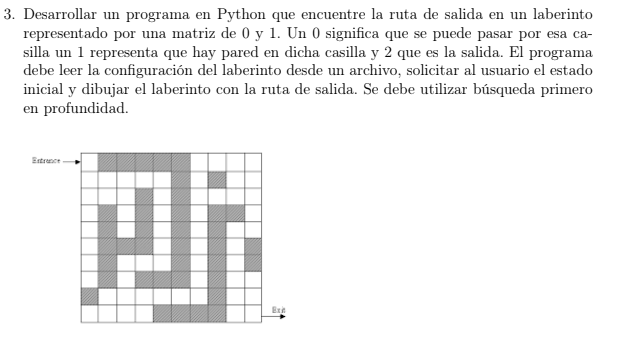


# **1. Importación de librerias**

In [96]:
from IPython.display import display
from copy import copy,deepcopy
from copy import copy
import ipywidgets as widgets
import time
import random

## **2. Estados Iniciales - Lectura de archivo**


In [97]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Miguelang703/ArtificialInteligenceExam2/master/Parcial2/Punto3/archivo.csv', delimiter=',',header=None)
matriz = df.values.tolist()

## **3. Clase tablero**

In [98]:
class Tablero:
  #Contstructor de la clase
  def __init__(self, tamanoCelda=(10, 10), nCeldas=None,ocupados=[],coordenadas=[]):
    #Definición de los atributos
    if nCeldas==None:
      self.nCeldas = (10,10)
    else:
      self.nCeldas = nCeldas
    self.out = widgets.HTML()
    display(self.out)
    self.tamanoCelda = tamanoCelda
    self.ocupados=ocupados
    self.coordenadas=[]

  #Metodo que representa graficamente el tablero
  def dibujar(self, objetos=[]):
    tablero = "<table border='1'>{}</table>"
    filas = ""
    for i in range(self.nCeldas[1]):
      s = ""              
      for j in range(self.nCeldas[0]):
        contenido =""
        for o in objetos:
          if o.x == j and o.y == i:
            contenido = \
            "<div style='transform: rotate({angulo}deg);font-size:{tamanoEmoticon}px;'>{emoticon}</div>".\
            format(angulo=o.angulo,tamanoEmoticon=o.tamanoEmoticon, emoticon=o.emoticon)     
        s += "<td style='height:{alto}px;width:{ancho}px;'>{contenido}</td>".\
          format(alto=self.tamanoCelda[0], ancho=self.tamanoCelda[1], 
                contenido=contenido)
      filas += "<tr>{}</tr>".format(s)
    tablero = tablero.format(filas)
    self.out.value=tablero


## **4. Clase Agentes**

In [99]:
#La clase Agente_numero funciona para la graficación del problema
class Agente_muro:
  def __init__(self, x=0, y=0, angulo=0, emoticon="❌", tamanoEmoticon=30):
    self.x=x
    self.y=y
    self.angulo=angulo
    self.emoticon=emoticon
    self.tamanoEmoticon=tamanoEmoticon

In [100]:
class Agente_agente:
  def __init__(self, x=0, y=0, angulo=0, emoticon="✅", tamanoEmoticon=30):
    self.x=x
    self.y=y
    self.angulo=angulo
    self.emoticon=emoticon
    self.tamanoEmoticon=tamanoEmoticon

## **5. Clase estado**

In [126]:
#La clase estado representa un estado en el que puede estar el problema del pulzze
class estado:
  estado_anterior = None
  
  def __init__(self,array=[],pos=[0,0]):
    self.array=array #Contiene el arreglo del estado
    self.visitados = [] #se agregan los que son muros a visitados
    self.muro = [] #auxiliar para dibujar el muro
    self.pos = pos
    self.posfinal=[]
    counti = 0
    countj = 0
    for i in self.array:
      for j in i:
        if j == 1:
          self.visitados.append([counti,countj])
          self.muro.append([counti,countj])
        if j == 2:
          self.posfinal=[counti,countj]
        # print(counti,countj,' valor: ',j)
        countj+=1
      counti+=1
      countj=0

  # Muestro del estado
  def __str__(self):
    return f'{str(self.pos)}\n'

  #Validación de igualdad para dos objetos de esta clase
  def __eq__(self, otro):
    return self.pos==otro
  
  def __repr__(self):
    return self.__str__()      

In [127]:
#En el siguiente metodo, se obtiene un arreglo de objetos, donde se toma como referencia un estado para sacar sus posibles estados siguentes
def getEstadoSiguiente(pila, visitados, tamanio_matriz):
  actual = pila[-1]

  #Limite x=0 +1 -1
  
  nuevo = copy(actual)
  nuevo.estado_anterior = actual
  xa,ya = nuevo.pos
  nuevo.pos = [xa+1,ya]

  if xa >= 0 and xa <tamanio_matriz:
    if nuevo not in visitados and nuevo not in pila and nuevo.pos != 1: return nuevo
  
  nuevo = copy(actual)
  nuevo.estado_anterior = actual
  xa,ya = nuevo.pos
  nuevo.pos = [xa-1,ya]
  if xa > 0 and xa <=tamanio_matriz:
    if nuevo not in visitados and nuevo not in pila and nuevo.pos!=1: return nuevo

  #Limite y=0 +1 -1
  nuevo = copy(actual)
  nuevo.estado_anterior = actual
  xa,ya = nuevo.pos
  nuevo.pos = [xa,ya+1]
  if ya >= 0 and ya <tamanio_matriz:
    if nuevo not in visitados and nuevo not in pila and nuevo.pos != 1: return nuevo

  nuevo = copy(actual)
  nuevo.estado_anterior = actual
  xa,ya = nuevo.pos
  nuevo.pos = [xa,ya-1]
  if ya > 0 and ya <= tamanio_matriz:
    if nuevo not in visitados and nuevo not in pila and nuevo.pos !=1: return nuevo

  return actual

## **6. Metodo Obtenersolucion**

In [134]:
def obtenerSolucion(estado):

  tamanio_matriz=len(estado.array)-1
  estado_inicial = estado
  estado_final = estado
  estado_actual = estado_inicial
  pila = [estado_actual]
  visitados = estado_inicial.visitados
  # print(estado_final.posfinal)
  while (estado_actual.pos != estado_final.posfinal):
    siguiente = getEstadoSiguiente(pila,visitados,tamanio_matriz)
    if siguiente != estado_actual:
      pila.append(siguiente)
    else:
      visitados.append(siguiente)
      pila.pop()
    estado_actual = pila[-1]
  return pila

## **7. Graficación de la solución**

In [176]:
agente = estado(matriz,[0,0]);

escenario=Tablero() #Creación del objeto tablero
muro=agente.muro
muros = []

#a el array numeros, se agregar los objetos numeros para la graficacion:
for i in muro:
  muros.append(Agente_muro(x=i[1],y=i[0],emoticon="🟥"))
escenario.dibujar(muros)

sol=obtenerSolucion(agente) #Se obtiene la solucion optima del juego 
ruta = []
for i in sol:
  ruta.append(Agente_agente(x=i.pos[1],y=i.pos[0],emoticon="✅"))

objetos = muros+ruta
escenario.dibujar(objetos)#Se dibuja el resultado final de la busqueda Primero En Profundidad

HTML(value='')